In [12]:
import sys
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# print(sys.version)
# print(np.__version__)
# print(pd.__version__)
# print(sklearn.__version__)
# print(seaborn.__version__)
# print(matplotlib.__version__)

## 🔍 기본 정보 확인

In [8]:
# df = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")
train.info()
train.describe()
train.isnull().sum(axis=0)
train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4376 non-null   object 
 1   설립연도            4376 non-null   int64  
 2   국가              4376 non-null   object 
 3   분야              3519 non-null   object 
 4   투자단계            4376 non-null   object 
 5   직원 수            4202 non-null   float64
 6   인수여부            4376 non-null   object 
 7   상장여부            4376 non-null   object 
 8   고객수(백만명)        3056 non-null   float64
 9   총 투자금(억원)       4376 non-null   float64
 10  연매출(억원)         4376 non-null   float64
 11  SNS 팔로워 수(백만명)  4376 non-null   float64
 12  기업가치(백억원)       3156 non-null   object 
 13  성공확률            4376 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 478.8+ KB


,ID,설립연도,국가,분야,투자단계,직원 수,인수여부,상장여부,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률
0,TRAIN_0000,2009,CT005,이커머스,Series A,4126.0,No,No,56.0,3365.0,4764.0,4.71,NaN,0.3
1,TRAIN_0001,2023,CT006,핀테크,Seed,4167.0,Yes,No,80.0,4069.0,279.0,1.00,2500-3500,0.8
2,TRAIN_0002,2018,CT007,기술,Series A,3132.0,Yes,Yes,54.0,6453.0,12141.0,4.00,3500-4500,0.5
3,TRAIN_0003,2016,CT006,NaN,Seed,3245.0,Yes,Yes,NaN,665.0,10547.0,2.97,NaN,0.7
4,TRAIN_0004,2020,CT002,에듀테크,Seed,1969.0,No,Yes,94.0,829.0,9810.0,1.00,1500-2500,0.1


## 🔍 변수별 분포 확인
**독립변수**   

- 수치형: 설립연도, 직원 수, 고객수(백만명), 총 투자금(억원), 연매출(억원), SNS 팔로워 수(백만명)   
- 범주형: 국가, 분야, 투자단계, 인수여부, 상장여부, 기업가치(백억원)

In [110]:
def get_hist_box_plot(name):
    skew_value = train[name].skew()
    print('왜도: ', skew_value)
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    sns.histplot(data=train, x=name, kde=True, multiple='layer', ax=axes[0])
    sns.boxplot(data=train, x=name, ax=axes[1])
    axes[0].set_title(f'{name} 분포')
    axes[1].set_title(f'{name} 이상치')

    plt.tight_layout()
    plt.show()


def get_count_bar_plot(name):
    fig, axes = plt.subplots(1, 2, figsize=(8,4))

    sns.countplot(x=name, data=train, ax=axes[0])
    sns.barplot(data=train, x=name, y='성공확률', ax=axes[1], estimator='mean')

    axes[0].set_title(f'{name} 갯수')
    axes[1].set_title(f'{name}별 성공확률')
    
    plt.tight_layout()
    plt.show()

# train['국가'].value_counts()

In [92]:
nemerical_var = ['설립연도', '직원 수', '고객수(백만명)', '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)']
categorical_var = ['국가', '분야', '투자단계', '인수여부', '상장여부', '기업가치(백억원)']

왜도:  0.008387340952509868


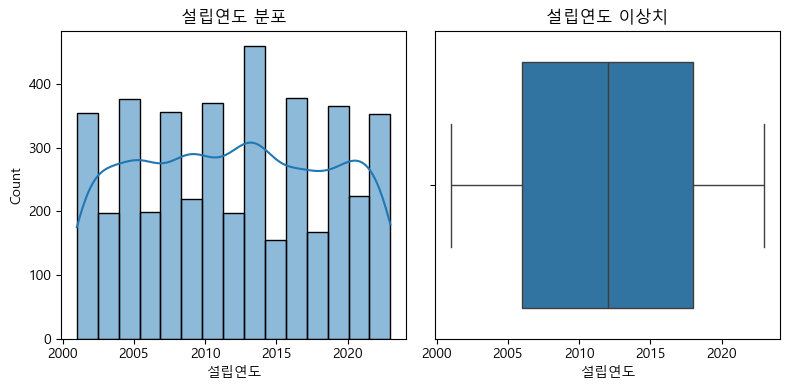

왜도:  0.024167005544992216


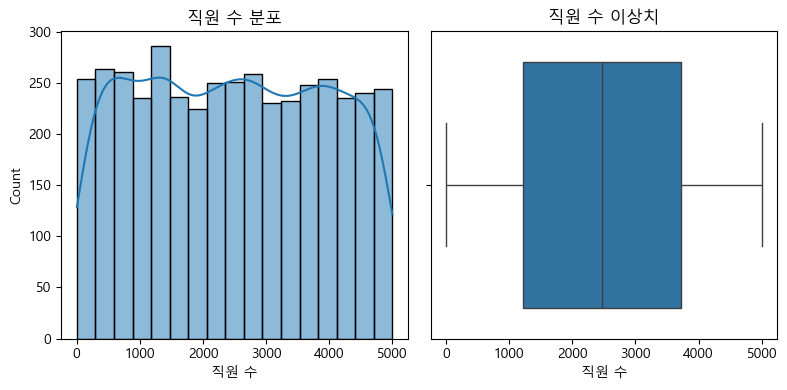

왜도:  0.02561670605580368


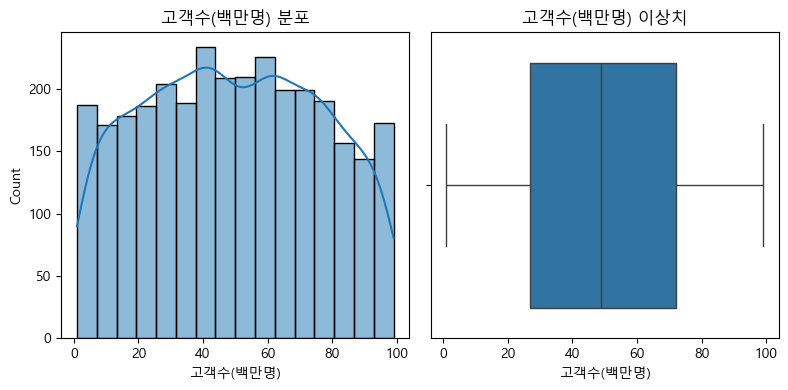

왜도:  -0.03630855795019302


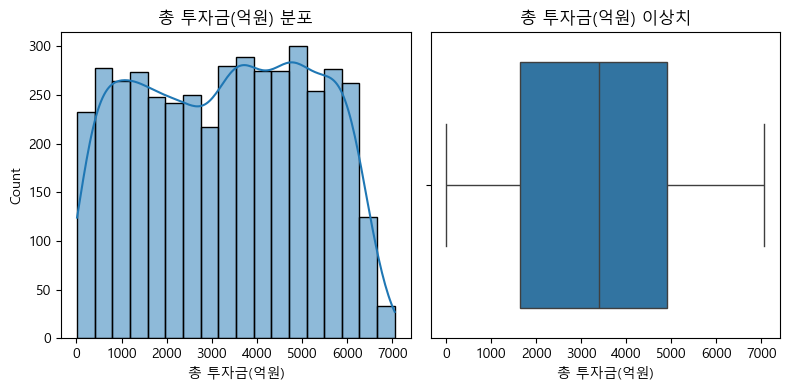

왜도:  0.042708462839298016


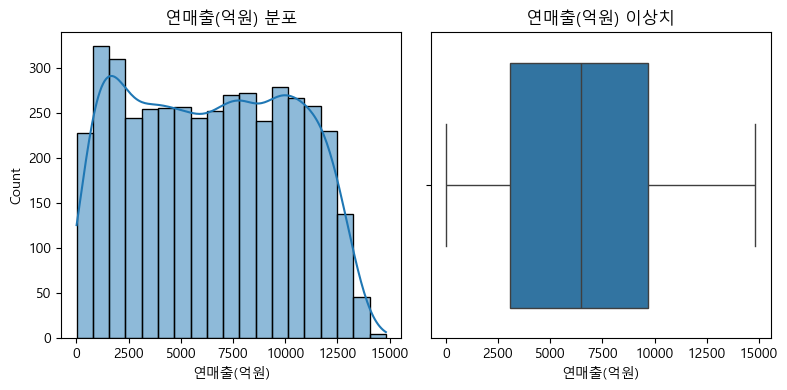

왜도:  -0.0816795551181627


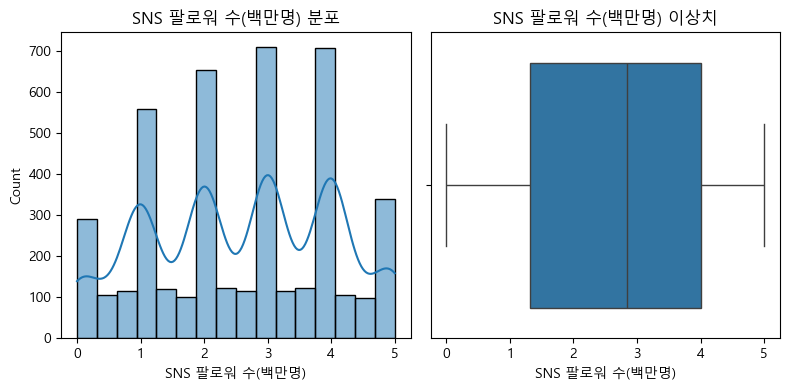

국가


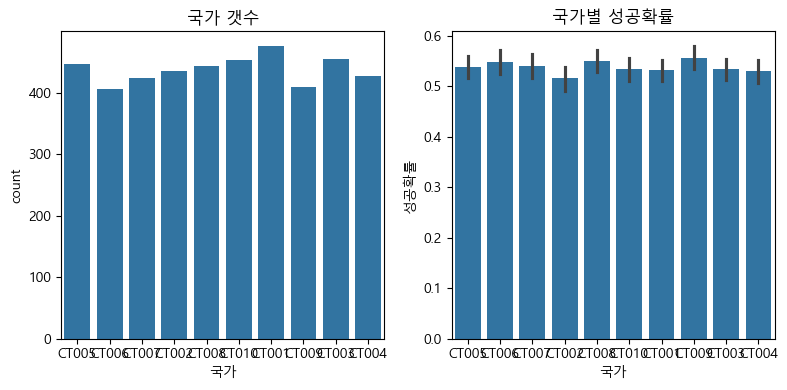

분야


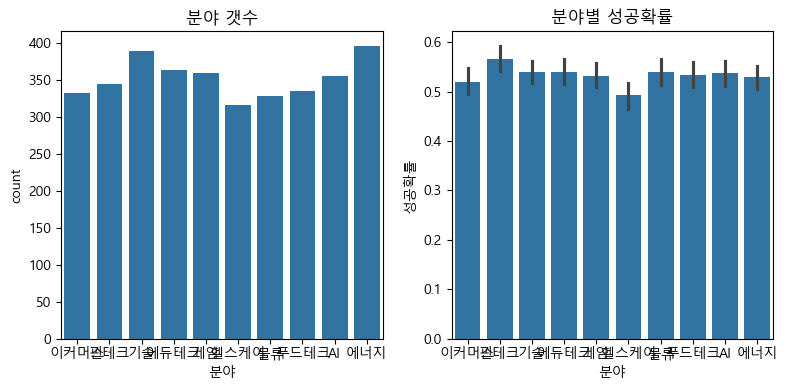

투자단계


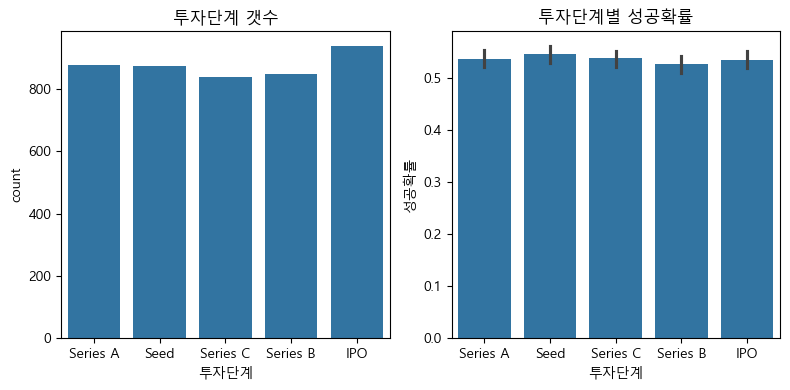

인수여부


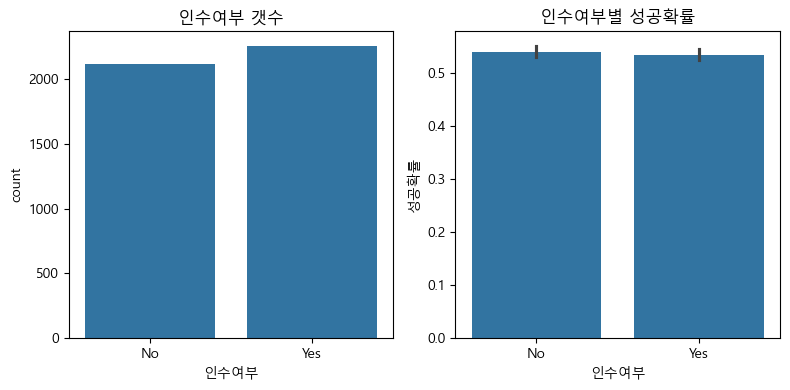

상장여부


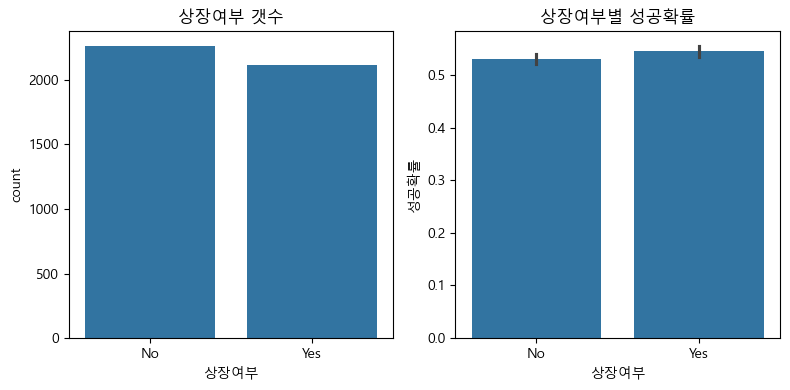

기업가치(백억원)


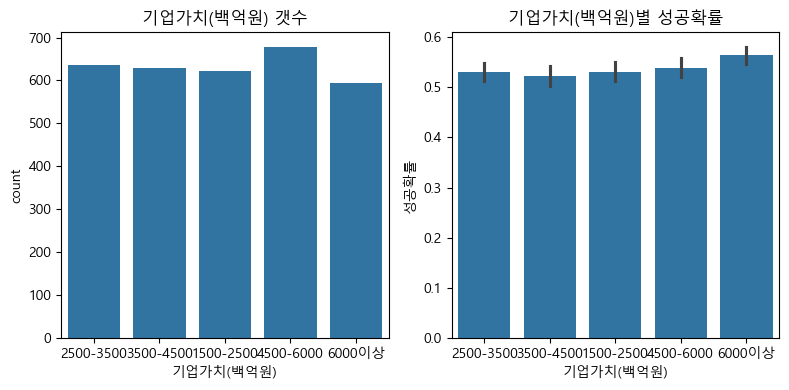

In [111]:

for name in nemerical_var:
    get_hist_box_plot(name)

for name in categorical_var:
    print(name)
    get_count_bar_plot(name)


## 🔍 타겟 변수(성공 확률) 확인

<Axes: xlabel='성공확률', ylabel='Count'>

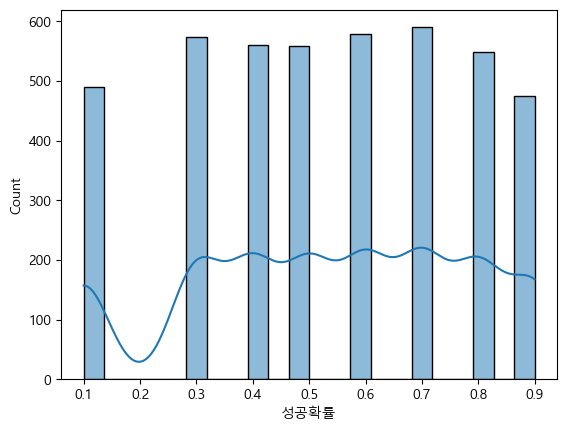

In [106]:
sns.histplot(data=train, x='성공확률', kde=True, multiple='layer')

## 🔍 변수 간 상관관계 분석
수치형 변수, 성공확률 간의 상관관계 매우 낮음 -> 다중공선성 의심되지 않음 -> 회귀분석 가능

<Axes: >

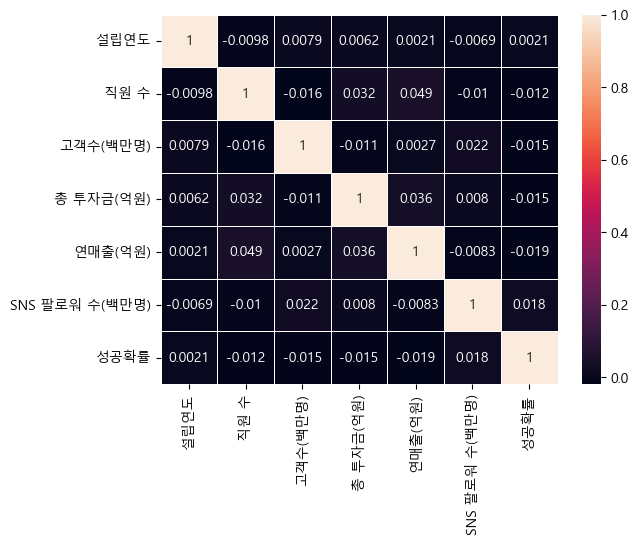

In [104]:
numeric_train = train.select_dtypes(include=['number'])
sns.heatmap(numeric_train.corr(), annot=True, linewidths=0.5)
